**Reminder:** First import the functions `open_session` and `close_session`. Then, obtain a reference to the simulator and the E-Puck by calling `open_session`. Since there are three epucks in the scene, we call it like this:

In [1]:
from simulator_interface import open_session, close_session
simulator, epuck = open_session(n_epucks=1)

Then execute the code you will encounter in the notebook or the code you will write for answering the questions. Whenever you want to restart from scratch (e.g. because something goes wrong or because you want to restart from scratch), first close the session by executing:

In [3]:
close_session(simulator, epuck)

This will properly close all the running processes. Then restart the notebook (`Kernel -> Restart`) and open the session again:

In [2]:
from time import sleep

# First detach all behavior on both robots:
epuck.detach_all_behaviors()
epuck.detach_all_routines()
epuck.stop()
    
# define the obstacle_avoidance behavior with a weight of 1. This is indicated by the third value returned by the function:
def obstacle_avoidance(robot):
    left, right = robot.prox_activations(tracked_objects=["20cm", "Tree", "Cup"])
    robot.value = 1. - (left + right ) / 2.0
    left_wheel = 1 - right
    right_wheel = 1 - left
    return left_wheel, right_wheel

def image_value(robot): 
    img = robot.camera_image()
    epuck.add_log("value", epuck.value)
    epuck.add_log("image", img)


# Attach and start both behaviors on both robots:
epuck.max_speed = 10.
epuck.attach_behavior(obstacle_avoidance, freq=10.0)
epuck.attach_routine(image_value, freq = 1.0)
epuck.start_all_behaviors()
sleep(1)
epuck.start_all_routines()

Behavior obstacle_avoidance started
Routine image_value started


In [3]:
epuck.max_speed = 20.

In [4]:
epuck.detach_all_behaviors()
epuck.detach_all_routines()
epuck.stop()


In [9]:
values = epuck.get_log("value")
images = epuck.get_log("image")

Populating the interactive namespace from numpy and matplotlib
0.0899978444449


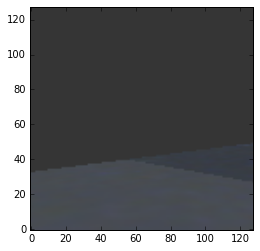

In [11]:
%pylab inline

i = argmin(values)
print values[i]
imshow(images[i], origin='lower')
